In [10]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import re

import nltk

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from wordcloud import WordCloud

from google.colab import files


In [17]:
uploaded=files.upload()

Saving test.csv to test (1).csv


In [22]:
filename=list(uploaded.keys())[0]

try:
    df=pd.read_csv("/content/test (1).csv", encoding='utf-8')
except UnicodeDecodeError:
    df=pd.read_csv("/content/test (1).csv", encoding='latin-1')

print("Dataset LoadedSucessfully!\n")
print("Preview:")
display(df.head())

Dataset LoadedSucessfully!

Preview:


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [23]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [24]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64


In [25]:
print("\nSentiment Classes:")
print(df['sentiment'].value_counts())



Sentiment Classes:
sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64


/tmp/ipython-input-3234535763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment',data=df,palette='coolwarm')


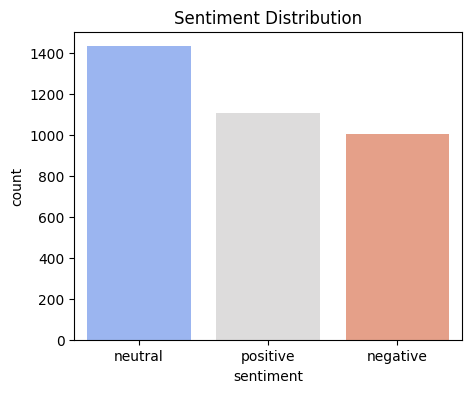

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(x='sentiment',data=df,palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def clean_text(text):
 text = str(text).lower()
 text = re.sub(r'http\S+', '', text)
 text = re.sub(r' [^a-z\s]', '', text)
 text = ''.join([word for word in text.split() if word not in stop_words])
 return text
df['clean_text'] = df['text'].apply(clean_text)
print("\n Cleaned Text Sample:")
display (df[['text', 'clean_text']].head())


 Cleaned Text Sample:


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text
0,Last session of the day http://twitpic.com/67ezh,lastsessionday
1,Shanghai is also really exciting (precisely -...,shanghaialsoreallyexcitingprecisely-skyscraper...
2,"Recession hit Veronique Branquinho, she has to...","recessionhitveroniquebranquinho,quitcompany,sh..."
3,happy bday!,happybday!
4,http://twitpic.com/4w75p - I like it!!,likeit!!


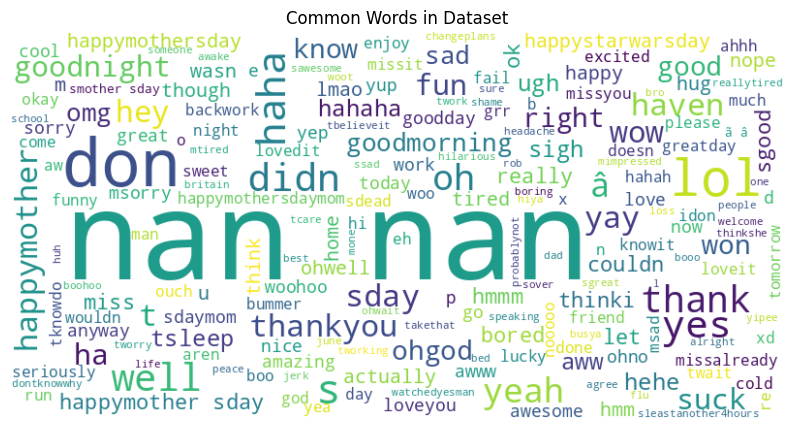

In [31]:
text_all = ' '.join(df['clean_text'])
plt.figure(figsize=(10,6))
wordcloud = WordCloud (width=800, height=400, background_color='white').generate(text_all)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Dataset")
plt.show()

In [36]:
df_cleaned = df.dropna(subset=['clean_text', 'sentiment'])

x = df_cleaned['clean_text']
y = df_cleaned['sentiment']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

In [39]:
y_pred = model.predict(X_test_vec)
print("\n Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(5,4))


 Model Evaluation:
Accuracy: 0.44695898161244696

Classification Report:
              precision    recall  f1-score   support

    negative       0.36      0.06      0.11       207
     neutral       0.43      0.89      0.58       286
    positive       0.67      0.22      0.34       214

    accuracy                           0.45       707
   macro avg       0.48      0.39      0.34       707
weighted avg       0.48      0.45      0.37       707



<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

In [40]:
df = pd.read_csv(filename, encoding = 'latin1')